In [16]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
home_price=pd.read_csv("D:\\madiha study\\data\\bhp.csv")
home_price
    

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [17]:
home_price.shape

(13200, 7)

In [18]:
home_price.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

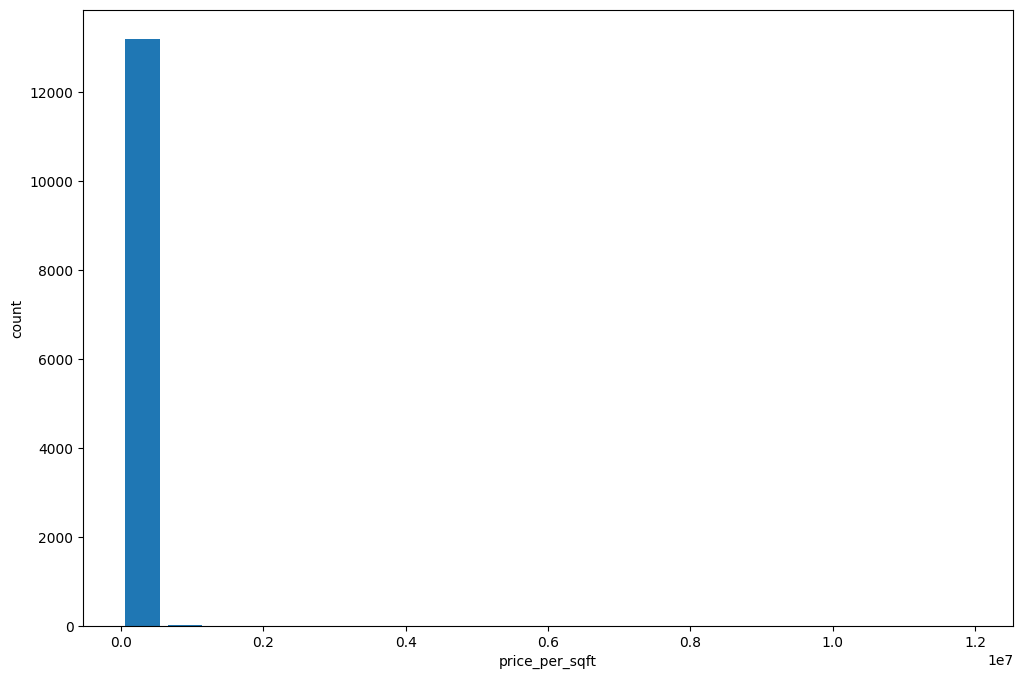

In [19]:
#histogram of the data set
plt.hist(home_price.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.show()

# Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data
# points but on the right hand side there are data points that have higher value for price per sqft
# but count of these data points is very tiny compared to 12000 hence we can hardly see any bar
# Using log scale can make visualization little better

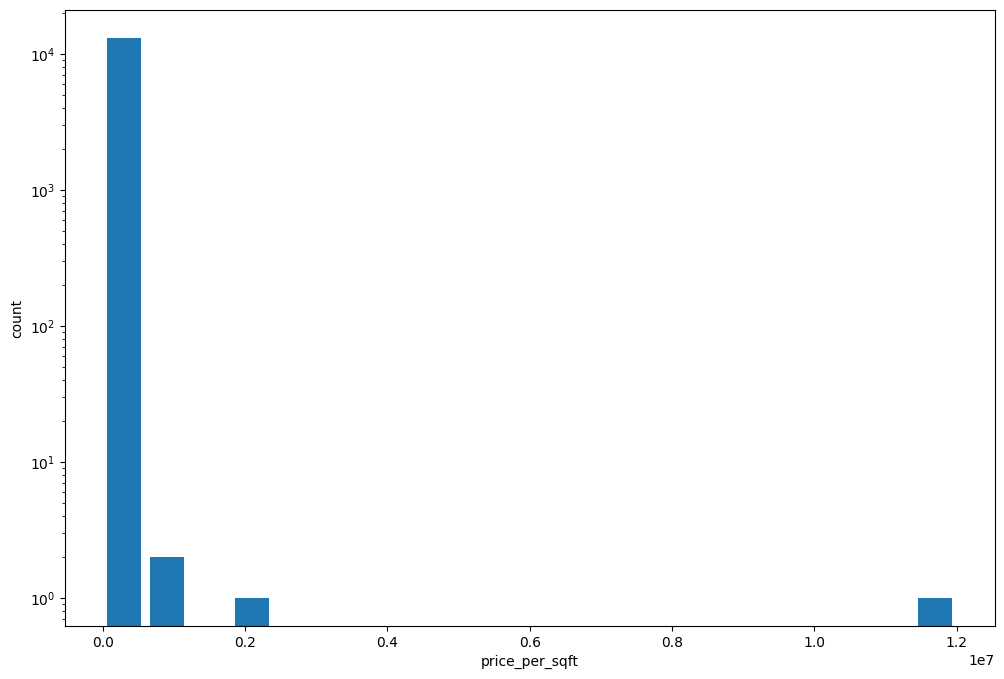

In [20]:
plt.hist(home_price.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.yscale('log')
plt.show()

# (1)Now remove outliers using quantile thresold

In [21]:
min_thershold,max_thershold=home_price.price_per_sqft.quantile([0.001,0.999])

min_thershold,max_thershold

(1366.184, 50959.36200000098)

In [22]:
home_price[home_price.price_per_sqft<min_thershold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [23]:
home_price[home_price.price_per_sqft>max_thershold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [90]:
df1_with_outliers=home_price[(home_price.price_per_sqft>max_thershold)|(home_price.price_per_sqft<min_thershold)]
df1_with_outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
7012,other,1 BHK,650.0,1.0,500.0,1,76923


In [91]:
df1_without_outliers=home_price[(home_price.price_per_sqft<max_thershold)&(home_price.price_per_sqft>min_thershold)]
df1_without_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [92]:
df1_without_outliers.shape

(13172, 7)

In [93]:
home_price.shape

(13200, 7)

In [94]:
home_price.shape[0]-df1_without_outliers.shape[0]

28

# (2) Now remove outliers using 4 standard deviation

In [74]:
upper_limit=df1_without_outliers.price_per_sqft.mean()+4*df1_without_outliers.price_per_sqft.std()
upper_limit

23227.73653589429

In [75]:
lower_limit=df1_without_outliers.price_per_sqft.mean()-4*df1_without_outliers.price_per_sqft.std()
lower_limit

-9900.429065502549

In [76]:
Data_remove_outliers=df1_without_outliers[(df1_without_outliers.price_per_sqft>upper_limit)|(df1_without_outliers.price_per_sqft<lower_limit)]
Data_remove_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [77]:
df3=df1_without_outliers[(df1_without_outliers.price_per_sqft>lower_limit)&(df1_without_outliers.price_per_sqft<upper_limit)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [79]:
df1_without_outliers.shape[0]-df3.shape[0]

125

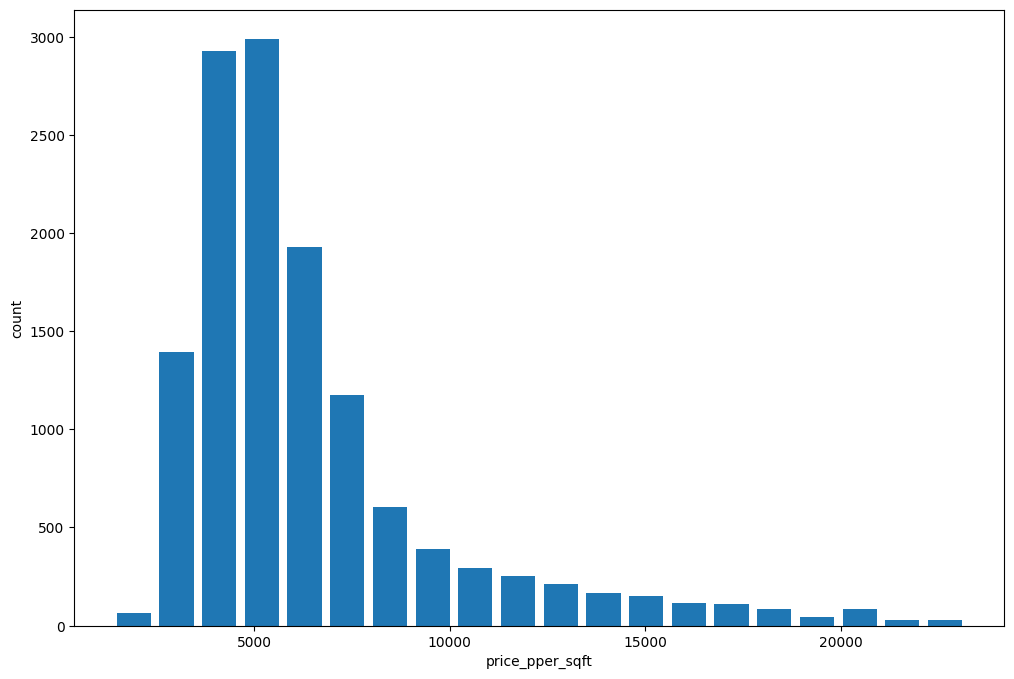

In [80]:
# plot the histo
plt.hist(df3.price_per_sqft,bins=20,rwidth=.8)
plt.xlabel("price_pper_sqft")
plt.ylabel("count")
plt.show()

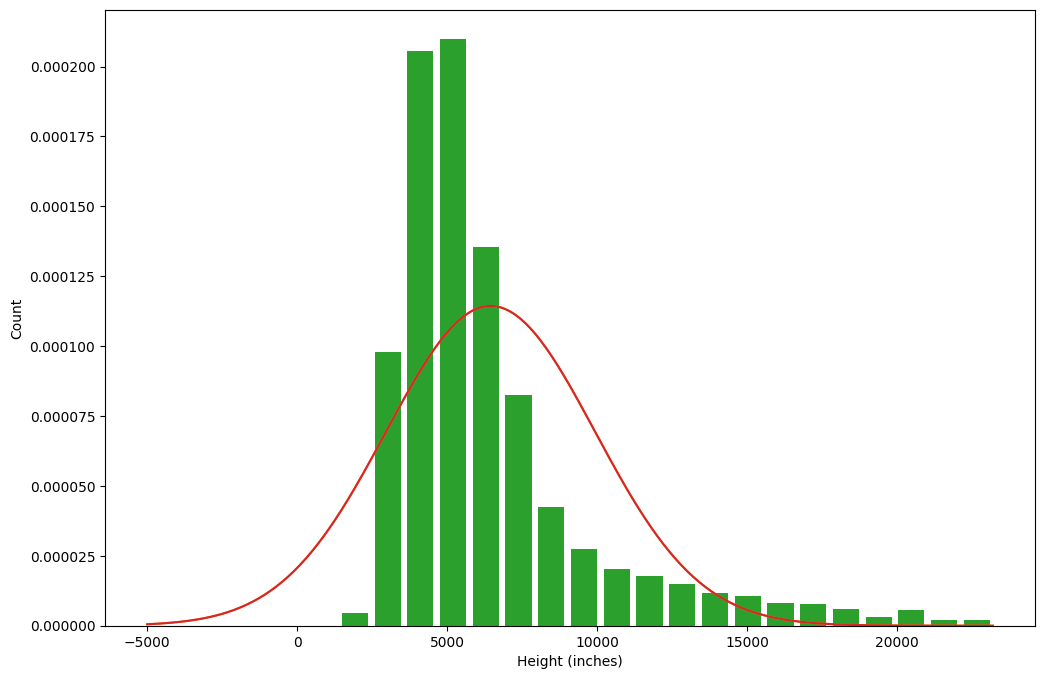

In [82]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))
plt.show()

# (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [98]:
# Z score also work same as the (2) point.
df2['zscore'] = (df1_without_outliers.price_per_sqft - df1_without_outliers.price_per_sqft.mean())/df1_without_outliers.price_per_sqft.std()
df2

C:\Users\Muhammad Awais\AppData\Local\Temp\ipykernel_18216\1956396945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df1_without_outliers.price_per_sqft - df1_without_outliers.price_per_sqft.mean())/df1_without_outliers.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,NaN
1005,other,1 BHK,15.0,1.0,30.0,1,200000,NaN
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,NaN
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,NaN
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,NaN
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111,NaN
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530,NaN
7012,other,1 BHK,650.0,1.0,500.0,1,76923,NaN
7575,other,1 BHK,425.0,1.0,750.0,1,176470,NaN
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150,NaN


In [105]:

# there is an error thats way Zscore NAN and below code could not work properly


df2.shape


(14, 8)

In [100]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape



(0, 8)

In [102]:
df4 = df2[(df2.zscore > -4) & (df2.zscore<4)]
df4.shape


(0, 8)

In [104]:
df1_without_outliers.shape[0] - df4.shape[0]

13172